In [2]:
import numpy as np
from scipy.ndimage import convolve

In [3]:
z_0_0020 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.0020mm.npy') + np.ones([1024, 1024])
z_0_0100 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.0100mm.npy') + np.ones([1024, 1024])
z_0_1000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.1000mm.npy') + np.ones([1024, 1024])
z_0_2000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.2000mm.npy') + np.ones([1024, 1024])
z_0_4000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.4000mm.npy') + np.ones([1024, 1024])
z_0_8000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-0.8000mm.npy') + np.ones([1024, 1024])
z_1_2000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-1.2000mm.npy') + np.ones([1024, 1024])
z_1_6000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-1.6000mm.npy') + np.ones([1024, 1024])
z_2_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-2.0000mm.npy') + np.ones([1024, 1024])
z_10_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-10.0000mm.npy') + np.ones([1024, 1024])
z_20_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-20.0000mm.npy') + np.ones([1024, 1024])
z_40_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-40.0000mm.npy') + np.ones([1024, 1024])
z_50_0000 = np.load('../TIE/retrieved_phases/bmstu_phase_br_noise_intensity/BMSTU_phase_dz=-50.0000mm.npy') + np.ones([1024, 1024])

phases = [z_0_1000, z_0_2000, z_0_4000, z_0_8000, z_1_2000, z_1_6000, z_2_0000, z_10_0000, z_20_0000, z_40_0000, z_50_0000]

In [4]:
inward = True
def laplace_matrix(array: np.ndarray, inward=True):
    if inward:
        kernel = np.array([
            [0, +1, 0],
            [1, -4, 1],
            [0, +1, 0],
        ])
    else:
        kernel = np.array([
            [0,  -1, 0],
            [-1, +4, -1],
            [0,  -1, 0],
        ])

    convolved = np.abs(convolve(array, kernel))

    result = np.abs(convolved)
    return result

powers = [
    np.sum(laplace_matrix(z_0_0020)),
    np.sum(laplace_matrix(z_0_0100)),
    np.sum(laplace_matrix(z_0_1000)),
    np.sum(laplace_matrix(z_0_2000)),
    np.sum(laplace_matrix(z_0_8000)),
    np.sum(laplace_matrix(z_1_2000)),
    np.sum(laplace_matrix(z_1_6000)),
    np.sum(laplace_matrix(z_2_0000)),
    np.sum(laplace_matrix(z_10_0000)),
    np.sum(laplace_matrix(z_20_0000)),
    np.sum(laplace_matrix(z_40_0000)),
    np.sum(laplace_matrix(z_50_0000)),
]

powers

[2399961.0477374806,
 494171.7969684813,
 84998.63462814079,
 61819.084805673716,
 33164.13404812785,
 26473.89356169668,
 22162.16037624223,
 18963.493273879925,
 5696.131579811322,
 3604.1363738822897,
 2259.401542577855,
 1924.3455548655913]

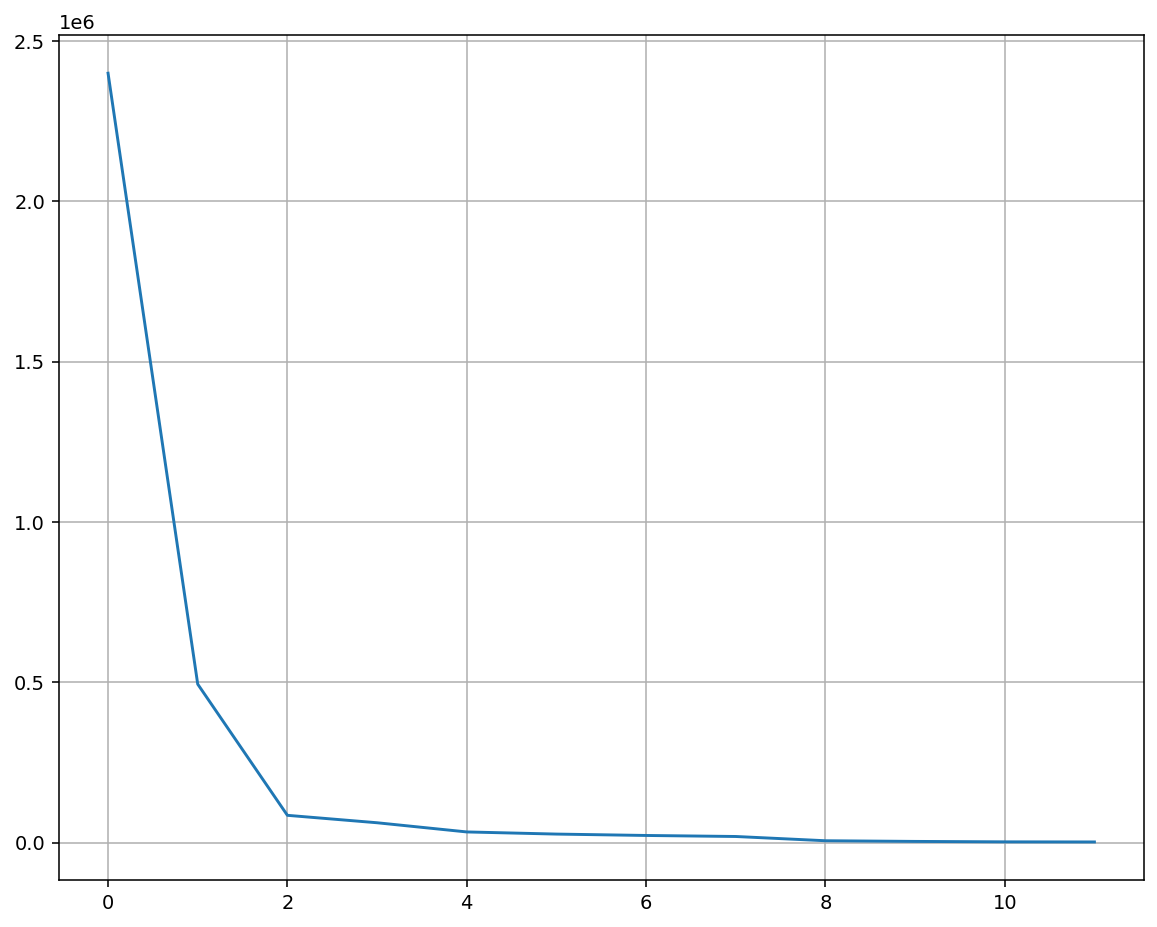

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=140)
plt.plot(powers)

plt.grid(True)
plt.show()